In [1]:
import numpy as np
import karabo_bridge as kb
import karabo_data as kd
import pylab as plt



In [32]:
path = '/gpfs/exfel/exp/SQS/201921/p002430/raw'
run = '/r0134'

In [33]:
runData = kd.RunDirectory(path+run)

Exception: No HDF5 files found in /gpfs/exfel/exp/SQS/201921/p002430/raw/r0134

In [4]:
runData.detector_sources

set()

In [5]:
runData.control_sources

frozenset({'FUSION_CDG',
           'P_GATT',
           'SA3_XTD10_MONO/MDL/PHOTON_ENERGY',
           'SA3_XTD10_VAC/GAUGE/G30510C',
           'SA3_XTD10_XGM/XGM/DOOCS',
           'SQS_DPU_LIC/CAM/YAG_UPSTR',
           'SQS_DPU_LIC/MOTOR/YAG_Y_UPSTR',
           'SQS_DPU_LIC/PROC/YAG_UPSTR',
           'SQS_NQS_CRSC/ACTRL/SLIT_Z_WIDTH',
           'SQS_NQS_CRSC/ASENS/SLIT_Z_WIDTH',
           'SQS_NQS_CRSC/GAUGE/STAGE_1',
           'SQS_NQS_CRSC/GAUGE/STAGE_2',
           'SQS_NQS_CRSC/GAUGE/STAGE_3',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_X',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_Y',
           'SQS_NQS_CRSC/MOTOR/NOZZLE_Z',
           'SQS_NQS_CRSC/TSYS/PARKER_TRIGGER',
           'SQS_NQS_DVMIS/TSYS/BEHLKE-1_TRIGGER',
           'SQS_NQS_DVMIS/TSYS/BEHLKE-2_TRIGGER',
           'SQS_NQS_MCPSCD/TSYS/CAMERA_TRIGGER',
           'SQS_NQS_TPAD/TSYS/CAM_TRIGGER',
           'SQS_NQS_VAC/GAUGE/DUMP',
           'SQS_RR_UTC/TSYS/TIMESERVER'})

In [29]:
tofavg = None
nmax = 50
isum = 0
for tid, data in runData.trains():
#     print("Processing train", tid)
    tofdata = data['SQS_DIGITIZER_UTC1/ADC/1:network']['digitizers.channel_1_A.raw.samples']
    if tofavg is None:
        tofavg = tofdata
        isum += 1
    else:
        tofavg += tofdata
        isum += 1
    if isum > nmax:
        break
tofavg = tofavg/float(nmax)

Processing train 101022314
Processing train 101022315
Processing train 101022316
Processing train 101022317
Processing train 101022318
Processing train 101022319
Processing train 101022320
Processing train 101022321
Processing train 101022322
Processing train 101022323
Processing train 101022324
Processing train 101022325
Processing train 101022326
Processing train 101022327
Processing train 101022328
Processing train 101022329
Processing train 101022330
Processing train 101022331
Processing train 101022332
Processing train 101022333
Processing train 101022334
Processing train 101022335
Processing train 101022336
Processing train 101022337
Processing train 101022338
Processing train 101022339
Processing train 101022340
Processing train 101022341
Processing train 101022342
Processing train 101022343
Processing train 101022344
Processing train 101022345
Processing train 101022346
Processing train 101022347
Processing train 101022348
Processing train 101022349
Processing train 101022350
P

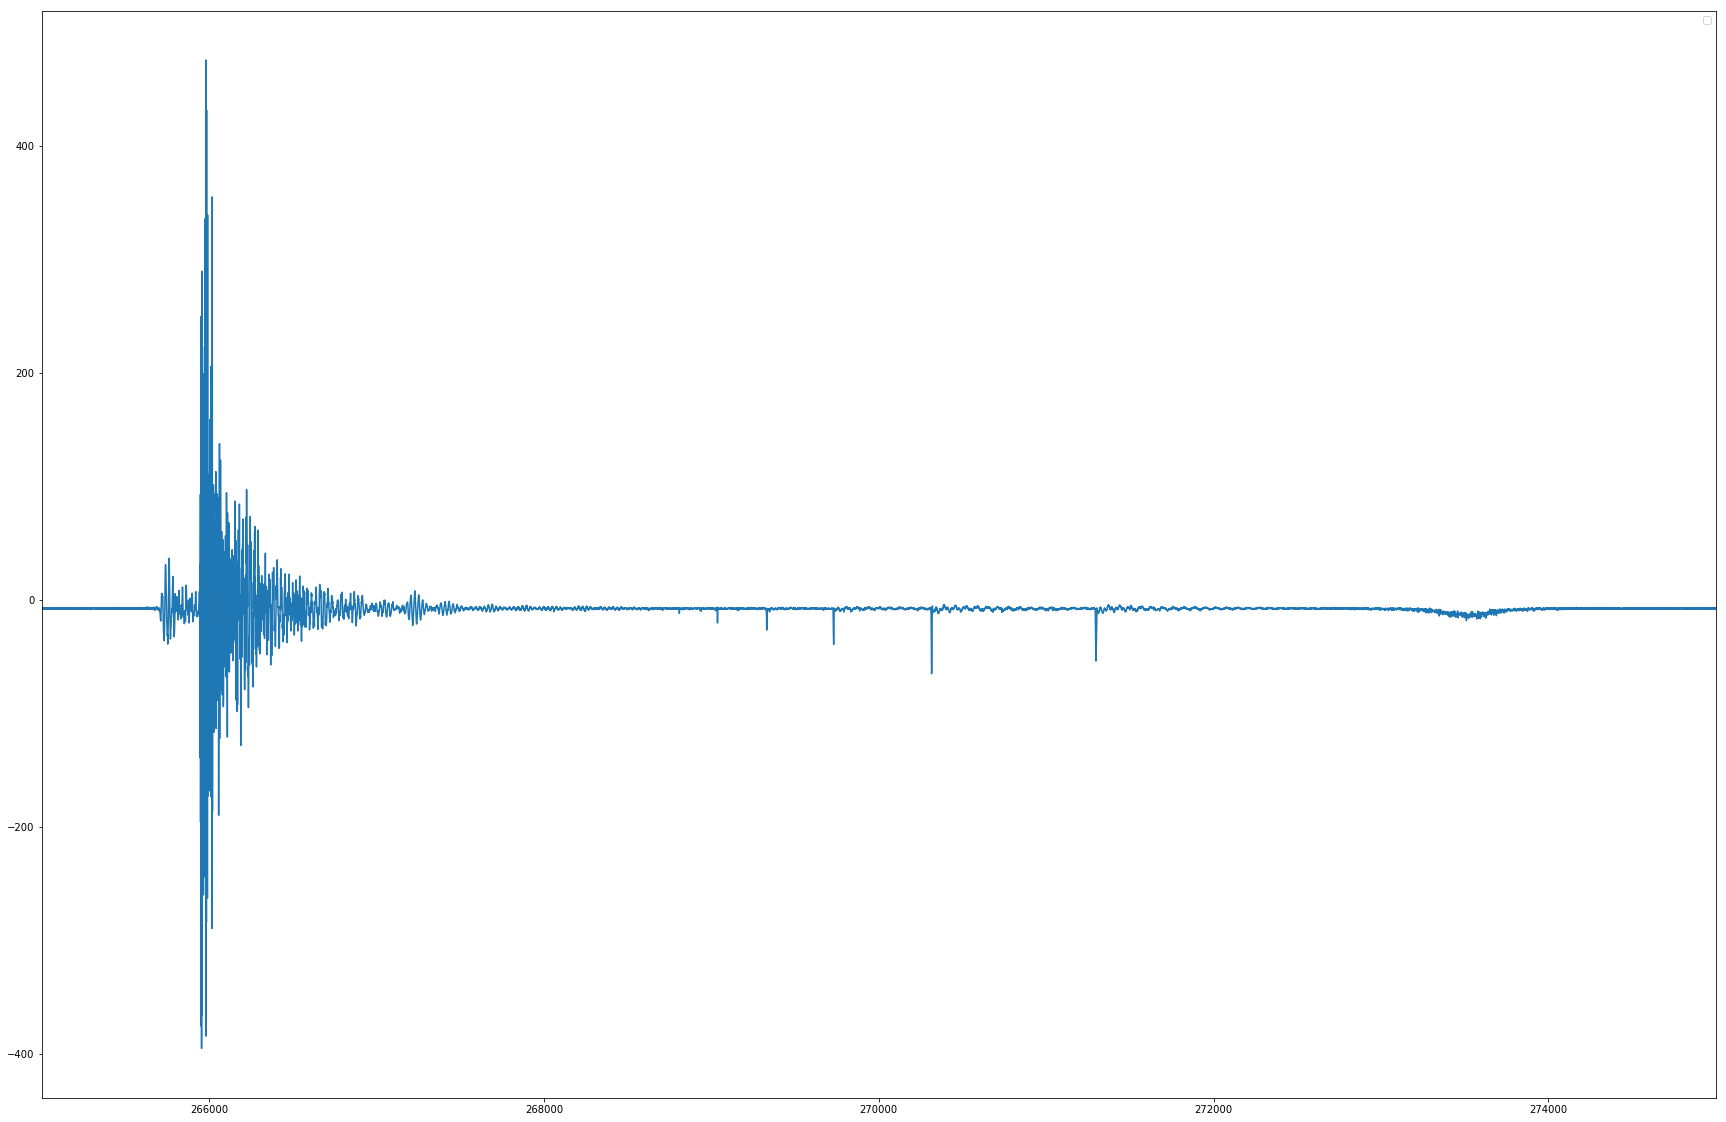

In [31]:
plt.figure(figsize = (30,20))
plt.plot(tofavg)
plt.xlim(265000,275000)
plt.legend()

/software/anaconda3/5.2/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


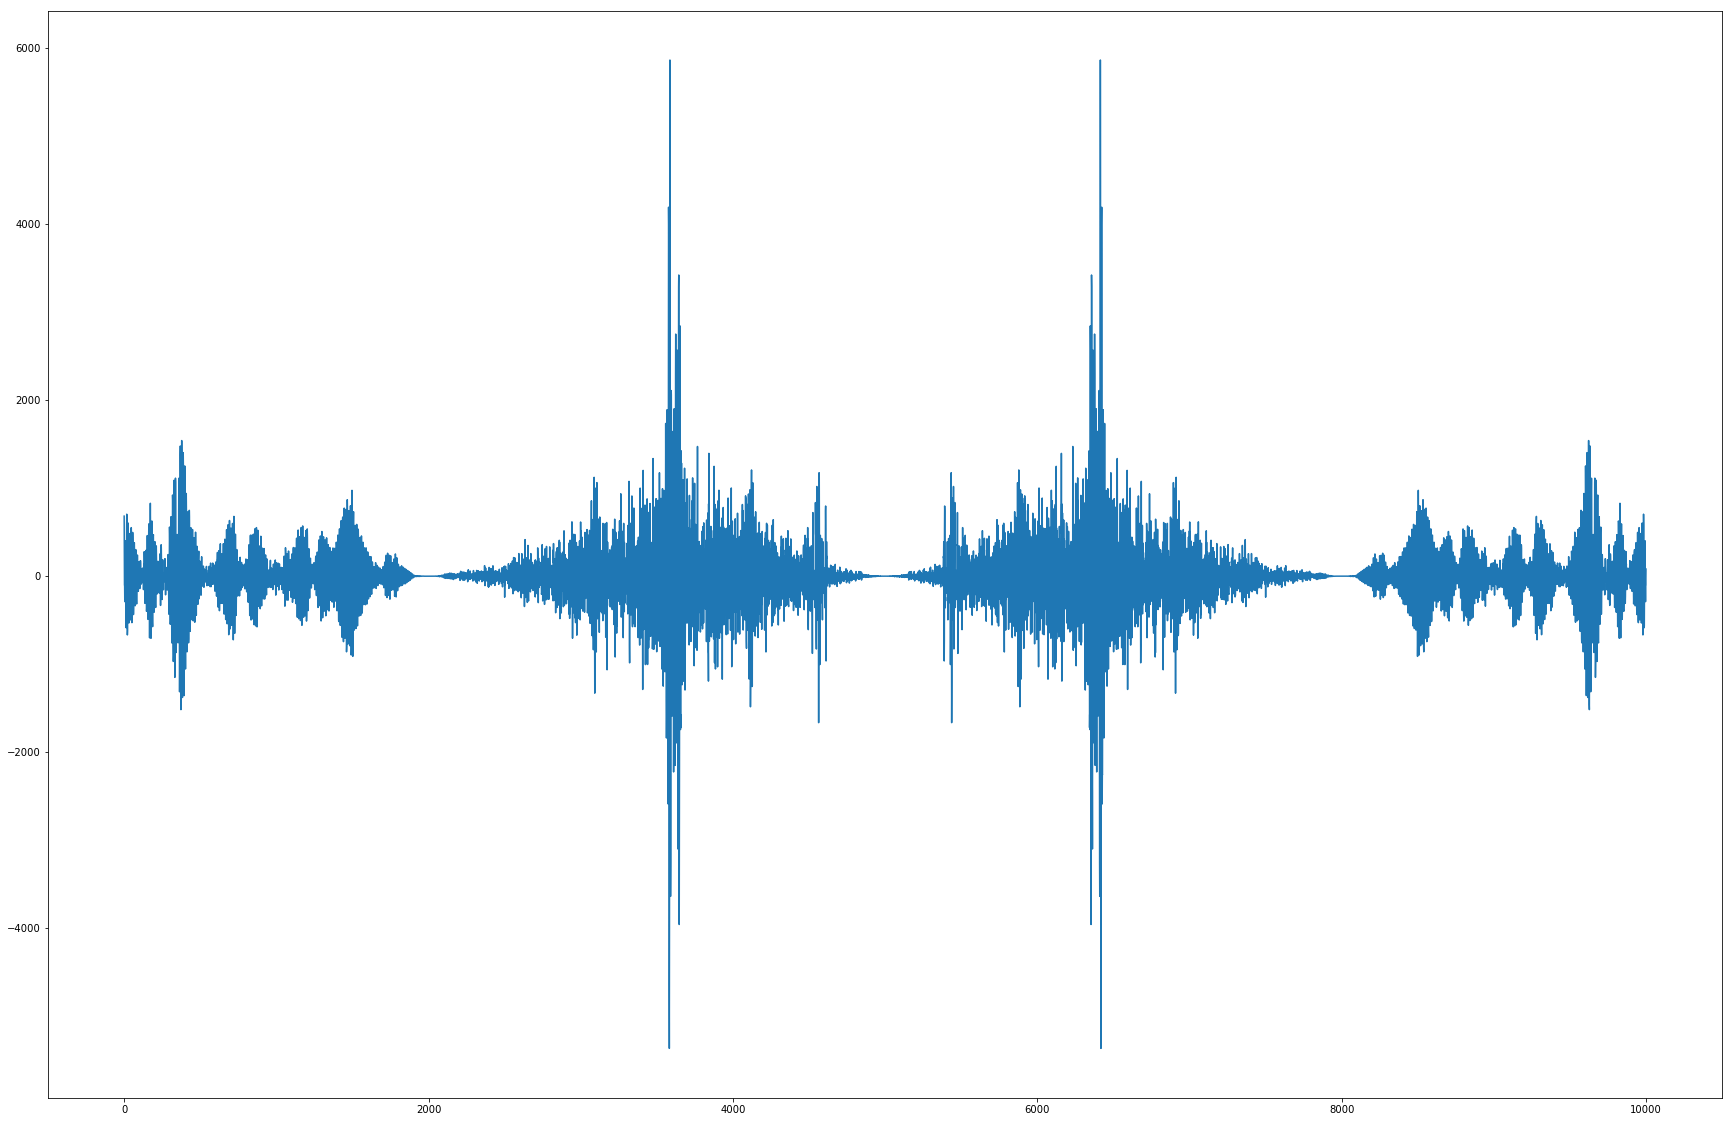

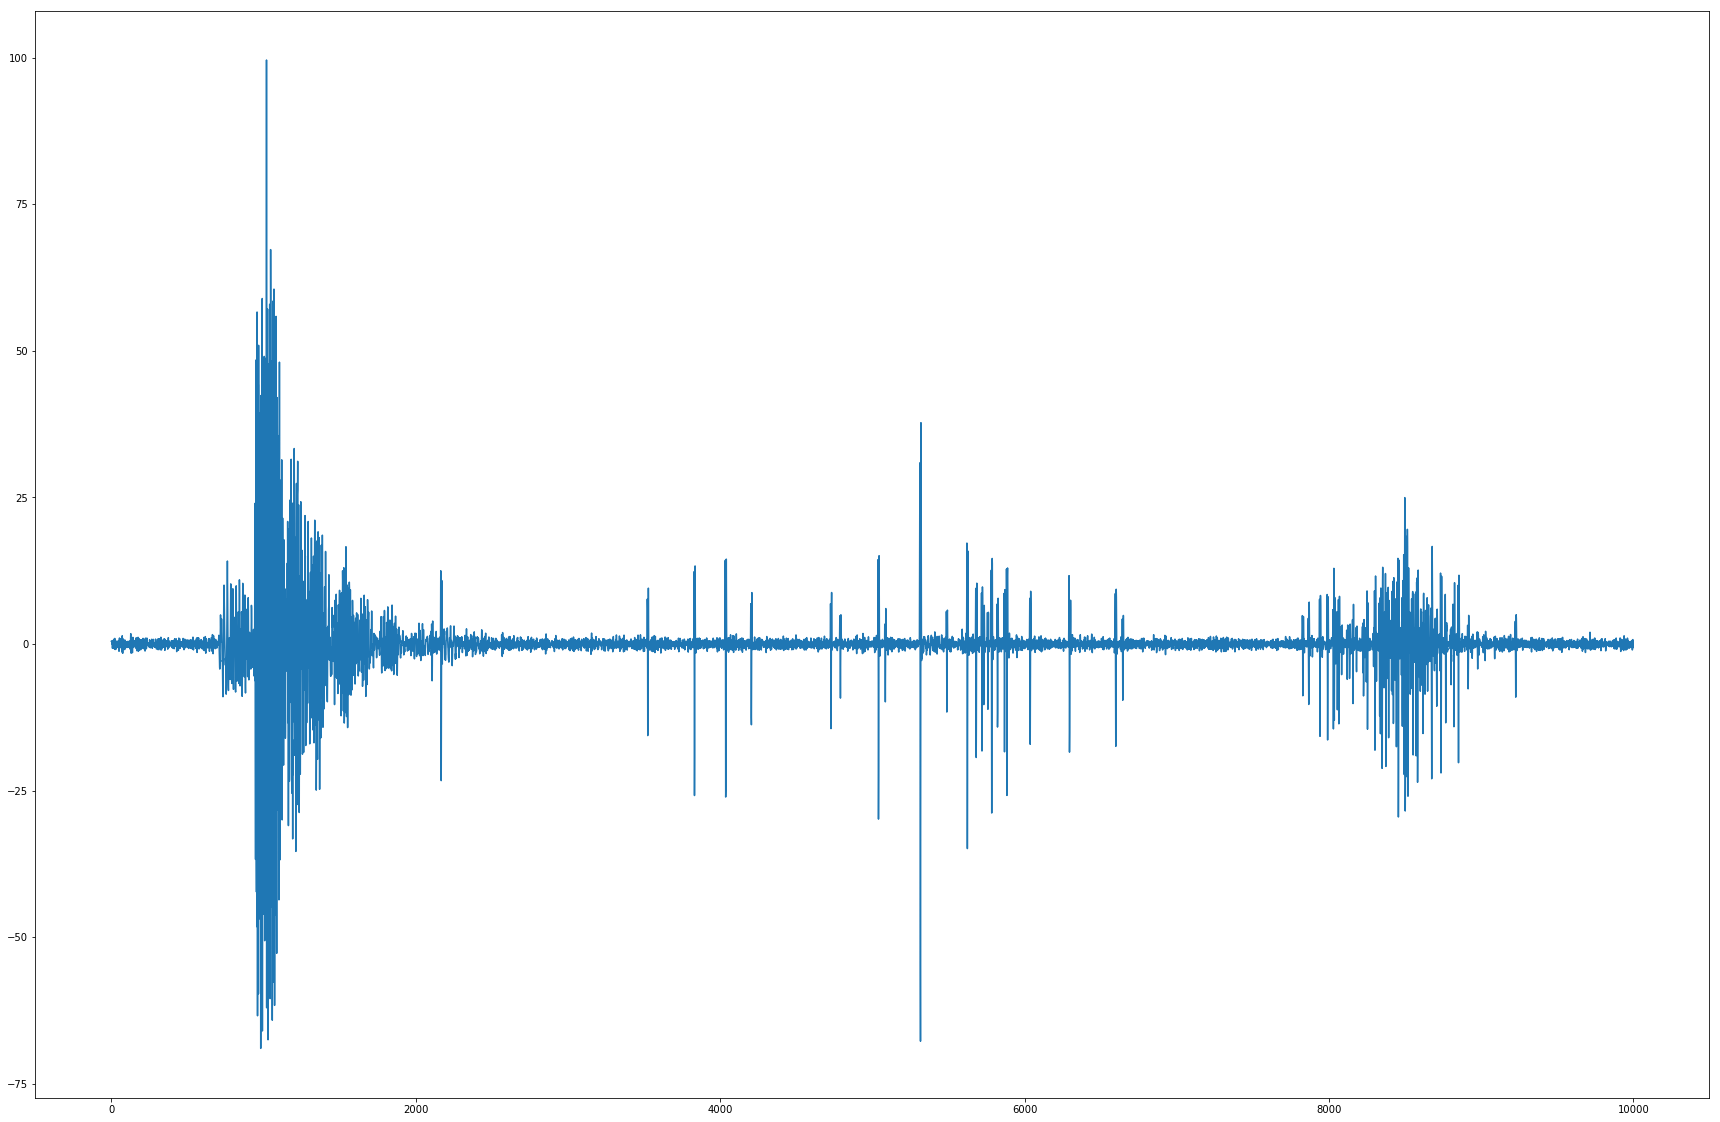

In [28]:
fftme = tofdata[265000:275000]
fftd = np.fft.fftshift( np.fft.fft( fftme ) )
# plt.plot( fftd )

NDIM = fftd.size
INDS = np.arange(NDIM)

dx = 3000.
sfilter = np.sin( np.pi* ( NDIM/2. - INDS )/(dx) )**2
gfilter = np.exp( -( NDIM/2. - INDS )**2/(2*dx**2) )
fixd = fftd *gfilter*sfilter
plt.figure(figsize = (30,20))
plt.plot( fixd )

plt.figure(figsize = (30,20))
revfft =  np.fft.ifft(np.fft.ifftshift(fixd) )
plt.plot(revfft)